In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

/home/hoang/Documents/school/4400/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [36]:
# Load data
matrix = []

with open("spambase.data", "r") as raw_data:
    for raw_line in raw_data:
        line = [float(x) for x in raw_line.split(",")]
        matrix.append(line)

data = pd.DataFrame(matrix)
row, col = data.shape
X, y = data.iloc[:,:col - 1], data[col - 1]
y = y.astype(bool)

# Question 1: Logistic Regression

## Data spliting and training

We will use a custom function from sklearn to split data into train and test set, and stratify the data based on the labels

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

We will verify the size of the train_set to contain 39.4% of spam positive emails

In [38]:
len([x for x in y_train if x == 1.0]) / len(y_train)

0.3939130434782609

In [39]:
# Training data on logistic regression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# data on the testing set

test_data = logReg.predict(X_test)

print("Confusion matrix\n", confusion_matrix(test_data, y_test), "\n")

tn, fp, fn, tp = confusion_matrix(test_data, y_test).ravel()
print("True negative:", tn, ", false positive:", fp, ", false negative:", fn, ",true positive:", tp, "\n")

print("Accuracy score", accuracy_score(test_data, y_test), "\n")

print("Precision", precision_score(test_data, y_test), "\n")

print("Recall", recall_score(test_data, y_test), "\n")

print("F1 score", f1_score(test_data, y_test), "\n")

Confusion matrix
 [[657  52]
 [ 40 402]] 

True negative: 657 , false positive: 52 , false negative: 40 ,true positive: 402 

Accuracy score 0.9200695047784535 

Precision 0.8854625550660793 

Recall 0.9095022624434389 

F1 score 0.8973214285714286 



## Feature coefficients

In [43]:
coef = logReg.coef_
print(coef)

[[-3.52934268e-01 -1.76611707e-01  1.35145792e-01  8.05758966e-01
   6.00426393e-01  1.04465626e+00  1.80243200e+00  8.09355388e-01
   6.38757879e-01  8.83938620e-02 -3.40252350e-01 -2.03688280e-01
  -6.45153111e-02  3.58285245e-01  8.31134777e-01  9.73495767e-01
   6.10583325e-01  3.10270065e-01  7.85826391e-02  7.52969095e-01
   2.80129271e-01  1.94931617e-01  1.75757289e+00  3.55686503e-01
  -1.57986670e+00 -9.62906884e-01 -3.15553384e+00  4.13637356e-01
  -1.15229430e+00 -5.38407927e-01 -4.12305191e-01 -2.65139384e-01
  -9.54308034e-01 -1.63721583e-01 -1.12462253e+00  7.48928764e-01
  -3.40297011e-02  3.15199298e-01 -6.61403514e-01 -5.88474668e-01
  -1.42462914e+00 -1.73338063e+00 -7.73331027e-01 -1.25412304e+00
  -7.87465318e-01 -1.27039564e+00 -5.65497268e-01 -1.52060295e+00
  -1.04372513e+00 -4.60701096e-01 -3.25120424e-01  2.61809336e-01
   3.78662239e+00  1.15420687e+00  7.21422815e-02  7.79967147e-03
   5.13449123e-04]]


In [44]:
feature_sort = sorted(X_train.columns, key=lambda x: -coef.reshape(-1, 1)[x])

In [45]:
feature_sort[0], feature_sort[-1]

(52, 26)

Feature number 52 is contributing the most to the classification of spam email. According to the NAMES database, this feature is the character "$". Feature number 26 is contributing less to the classification of spam email, which is the word "hpl".

## Varying threshold 

In [49]:
proba = logReg.predict_proba(X_test)
logReg.classes_

array([False,  True])

In [58]:
def get_prediction(T, proba):
    result = []
    for pred in proba:
        if pred[0] > T:
            result.append(False)
        else:
            result.append(True)
    return result

def get_accuracy(a1, a2):
    assert len(a1) == len(a2)
    diff = 0
    for i in range(len(a1)):
        if a1[i] != a2[i]:
            diff += 1
            
    return 1 - diff/len(a1)

In [67]:
ori = logReg.predict(X_test)
test_labels = np.array(y_test)

In [69]:
# Test accuracy on T = 0.5

Tpoint5 = get_prediction(0.5, proba)
get_accuracy(Tpoint5, test_labels)

0.9200695047784535

In [70]:
# Accuracy on each point of the threshold
acc = []

for T in thres:
    pred = get_prediction(T, proba)
    a = get_accuracy(pred, test_labels)
    
    print("Accuracy on threshold T=", T, " is: ", a)
    acc.append(a)

Accuracy on threshold T= 0.1  is:  0.8340573414422241
Accuracy on threshold T= 0.2  is:  0.8731537793223284
Accuracy on threshold T= 0.3  is:  0.9035621198957429
Accuracy on threshold T= 0.4  is:  0.9105125977410947
Accuracy on threshold T= 0.5  is:  0.9200695047784535
Accuracy on threshold T= 0.6  is:  0.9278887923544744
Accuracy on threshold T= 0.7  is:  0.9087749782797567
Accuracy on threshold T= 0.8  is:  0.8774978279756733
Accuracy on threshold T= 0.9  is:  0.8001737619461338


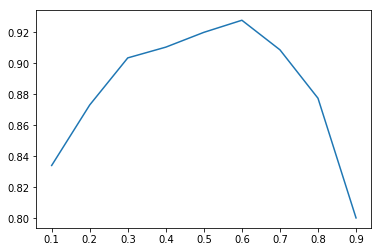

In [71]:
 # Plotting graph on accuracy and T
plt.plot(thres, acc)